In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial.transform import Rotation as R

## IMU-based Positioning and Transformation for a Robot
### This notebook demonstrates how to use IMU data to calculate the robot's position and adjust it using transformation and rotation matrices.

## Introduction
The IMU (Inertial Measurement Unit) provides data about the robot's orientation and movement. We use this data to:
1. Calculate the robot's current position.
2. Apply transformations and rotations to position the robot correctly in a global frame.

## Step 1: Simulate IMU Data

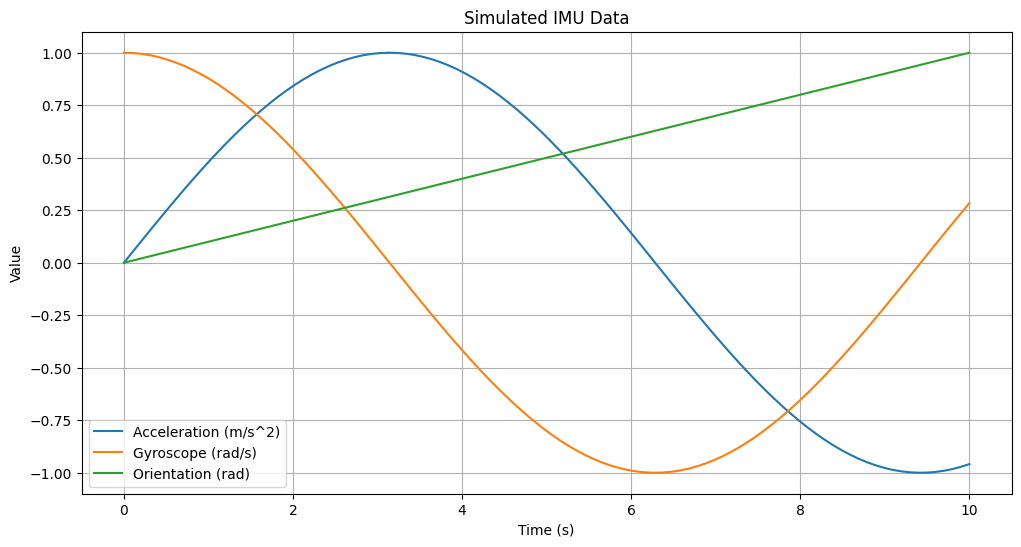

In [2]:
# Simulate raw IMU data for accelerometer, gyroscope, and orientation angles.
def simulate_imu_data():
    time_steps = np.linspace(0, 10, 100)  # Simulate for 10 seconds with 100 samples
    accelerations = np.sin(0.5 * time_steps)  # Simulated accelerometer data (m/s^2)
    angular_velocity = np.cos(0.5 * time_steps)  # Simulated gyroscope data (rad/s)
    orientation_angles = 0.1 * time_steps  # Simulated orientation angles (radians)
    return time_steps, accelerations, angular_velocity, orientation_angles

# Generate the IMU data
time, accel, gyro, orientation = simulate_imu_data()

# Plot simulated data
plt.figure(figsize=(12, 6))
plt.plot(time, accel, label="Acceleration (m/s^2)")
plt.plot(time, gyro, label="Gyroscope (rad/s)")
plt.plot(time, orientation, label="Orientation (rad)")
plt.title("Simulated IMU Data")
plt.xlabel("Time (s)")
plt.ylabel("Value")
plt.legend()
plt.grid()
plt.show()

## Step 2: Define Transformation and Rotation Matrices

In [3]:
# Translation Matrix
def translation_matrix(dx, dy, dz):
    return np.array([
        [1, 0, 0, dx],
        [0, 1, 0, dy],
        [0, 0, 1, dz],
        [0, 0, 0, 1]
    ])

# Rotation Matrix
def rotation_matrix(roll, pitch, yaw):
    r = R.from_euler('xyz', [roll, pitch, yaw])
    return r.as_matrix()

## Step 3: Simulate Robot Movement and Update Position

In [4]:
# Initialize robot position in the global frame
position = np.array([0, 0, 0, 1])  # Homogeneous coordinates (x, y, z, 1)
positions = []  # To store the robot's trajectory

# Process IMU data
for i in range(len(time)):
    # Translation (based on simulated accelerometer data)
    dx = accel[i] * 0.1  # Simulated small displacement in x
    dy = 0  # No movement in y for simplicity
    dz = 0  # No movement in z for simplicity

    # Orientation (based on simulated gyroscope/orientation data)
    roll = orientation[i]  # Roll angle (rad)
    pitch = 0  # No pitch for simplicity
    yaw = gyro[i]  # Yaw angle (rad)

    # Apply transformations
    T = translation_matrix(dx, dy, dz)
    R_mat = np.eye(4)  # Homogeneous rotation matrix
    R_mat[:3, :3] = rotation_matrix(roll, pitch, yaw)

    # Update position
    transform = T @ R_mat
    position = transform @ position

    # Store trajectory
    positions.append(position[:3])

# Convert trajectory to numpy array
positions = np.array(positions)

## Step 4: Visualize the Robot's Trajectory

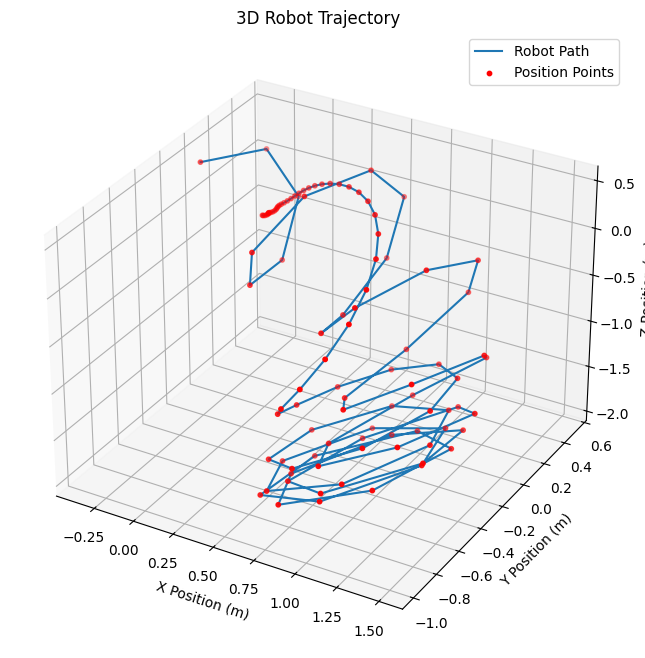

In [5]:
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.plot(positions[:, 0], positions[:, 1], positions[:, 2], label="Robot Path")
ax.scatter(positions[:, 0], positions[:, 1], positions[:, 2], c='r', s=10, label="Position Points")
ax.set_title("3D Robot Trajectory")
ax.set_xlabel("X Position (m)")
ax.set_ylabel("Y Position (m)")
ax.set_zlabel("Z Position (m)")
ax.legend()
plt.show()

## Conclusion
This notebook demonstrates how to process IMU data to determine the robot's position and apply transformation matrices for positioning. The trajectory visualization shows the robot's movement in 3D space based on simulated IMU data.
